In [20]:
import gym
import numpy as np
from IPython import display
from envs import Maze
import matplotlib.pyplot as plt

In [3]:
env = Maze()

In [4]:
initial_state = env.reset()
print(f'initial_State:{initial_state}')

initial_State:(0, 0)


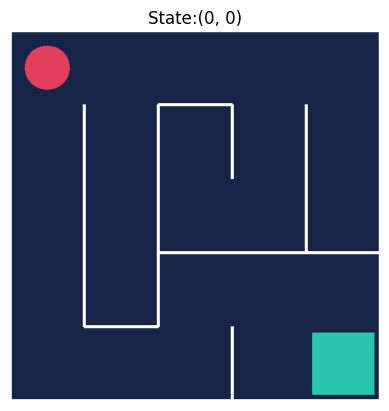

In [5]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f'State:{initial_state}')
plt.imshow(frame)

In [6]:
action = 2
next_state, reward, done, info = env.step(action)
print(f'Next State & Reward are : {next_state}, {reward}')

Next State & Reward are : (1, 0), -1.0


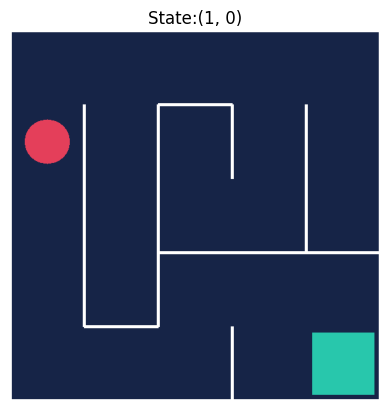

In [7]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f'State:{next_state}')
plt.imshow(frame)

In [8]:
print(f'The space state type:{env.observation_space}')

The space state type:MultiDiscrete([5 5])


In [10]:
env = Maze()
state = env.reset()
trajectory = []
for _ in range(3):
    action = env.action_space.sample()
    next_state, reward, done, extra_info = env.step(action)
    trajectory.append([state, action, reward, done, next_state])
    state = next_state
env.close()
print(f'Trajectory:\n {trajectory}')

Trajectory:
 [[(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 2, -1.0, False, (1, 0)], [(1, 0), 0, -1.0, False, (0, 0)]]


In [16]:
env=Maze()
state=env.reset()
episode=[]
done=False
while not done:
    action=env.action_space.sample()
    next_state, reward, done, extra_info = env.step(action)
    episode.append([state, action, reward, done, next_state])
env.close()
print(f'Episode:\n {episode}')

Episode:
 [[(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 2, -1.0, False, (1, 0)], [(0, 0), 2, -1.0, False, (2, 0)], [(0, 0), 0, -1.0, False, (1, 0)], [(0, 0), 1, -1.0, False, (1, 0)], [(0, 0), 1, -1.0, False, (1, 0)], [(0, 0), 2, -1.0, False, (2, 0)], [(0, 0), 2, -1.0, False, (3, 0)], [(0, 0), 2, -1.0, False, (4, 0)], [(0, 0), 2, -1.0, False, (4, 0)], [(0, 0), 0, -1.0, False, (3, 0)], [(0, 0), 3, -1.0, False, (3, 0)], [(0, 0), 3, -1.0, False, (3, 0)], [(0, 0), 2, -1.0, False, (4, 0)], [(0, 0), 1, -1.0, False, (4, 1)], [(0, 0), 2, -1.0, False, (4, 1)], [(0, 0), 3, -1.0, False, (4, 0)], [(0, 0), 2, -1.0, False, (4, 0)], [(0, 0), 2, -1.0, False, (4, 0)], [(0, 0), 1, -1.0, False, (4, 1)], [(0, 0), 0, -1.0, False, (4, 1)], [(0, 0), 0, -1.0, False, (4, 1)], [(0, 0), 3, -1.0, False, (4, 0)], [(0, 0), 0, -1.0, False, (3, 0)], [(0, 0), 3, -1.0, False, (3, 0)], [(0, 0), 3, -1.0, False, (3, 0)], [(0, 0), 1, -1.0, False, (3, 0)], [(0, 0), 2, -1.0, False, (4, 0)], [(0

In [17]:
env = Maze()
state = env.reset()
action = env.action_space.sample()
_, reward, _, _=env.step(action)
print(f'We achieved a reward of {reward} by taking action {action} in state{state}')

We achieved a reward of -1.0 by taking action 3 in state(0, 0)


In [19]:
env = Maze()
state = env.reset()
done = False
gamma = 0.99
G_0 = 0
t = 0
while not done:
    action = env.action_space.sample()
    _, reward, done, _ = env.step(action)
    G_0 += gamma ** t * reward
    t += 1
env.close()
print(f"""It took {t} with the return of {G_0}""")


It took 284 with the return of -94.24036097430579


In [21]:
def random_policy(state):
    return np.array([0.25]*4)
env = Maze()
state = env.reset()
action_probabilities = random_policy(state)


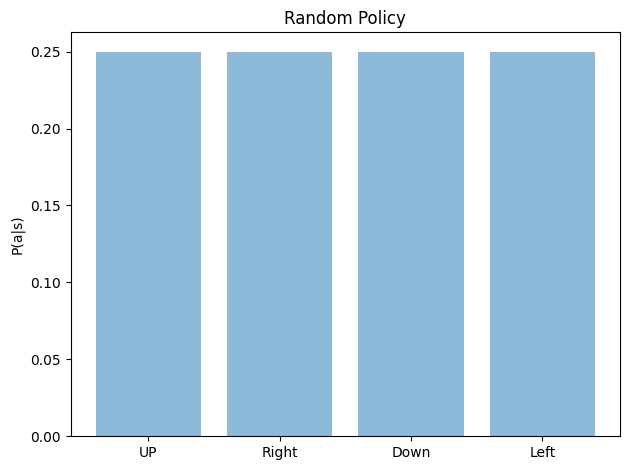

In [24]:
objects = ('UP', 'Right', 'Down', 'Left')
y_pos = np.arange(len(objects))

plt.bar(y_pos, action_probabilities, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('P(a|s)')
plt.title('Random Policy')
plt.tight_layout()
plt.show()

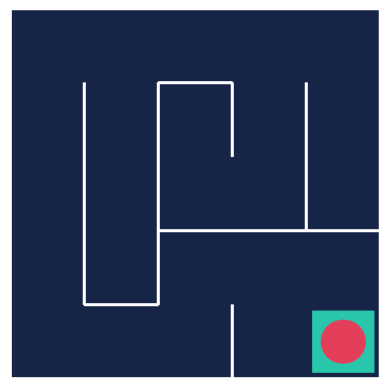

In [29]:
env.reset()
done = False
img = plt.imshow(env.render(mode='rgb_array'))
while not done:
    action = np.random.choice(range(4), 1, p=action_probabilities)
    _, _, done, _ = env.step(action)
    img.set_data(env.render(mode='rgb_array'))
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
env.close()